# Detecção de Outliers

## Detecção de Outliers com BoxPlot

### Importação

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
base_credit = pd.read_csv('../data/credit_data.csv')
base_credit

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


default:
- 0: indica que o cliente paga
- 1: indica que o cliente não paga

### Valores Faltantes

In [3]:
base_credit.isnull().sum()

clientid    0
income      0
age         3
loan        0
default     0
dtype: int64

Tratamento será apagando os valores NaN.

In [4]:
base_credit.dropna(inplace=True)

In [5]:
base_credit.isnull().sum()

clientid    0
income      0
age         0
loan        0
default     0
dtype: int64

### Gráfico Boxplot e detecção

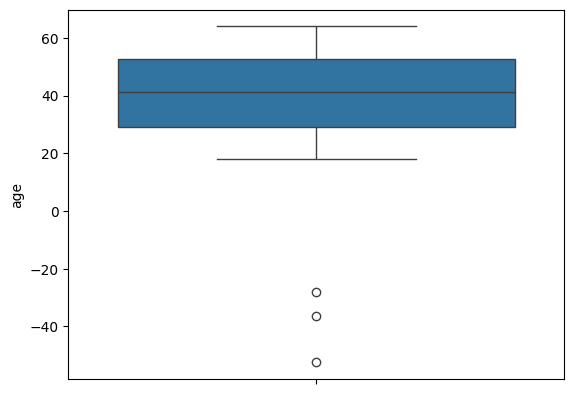

In [7]:
# Detectando Outliers
grafico = sns.boxplot(base_credit, y='age')

In [8]:
outliers_age = base_credit[base_credit['age'] < 0]
outliers_age

,clientid,income,age,loan,default
15,16,50501.726689,-28.218361,3977.287432,0
21,22,32197.620701,-52.423280,4244.057136,0
26,27,63287.038908,-36.496976,9595.286289,0


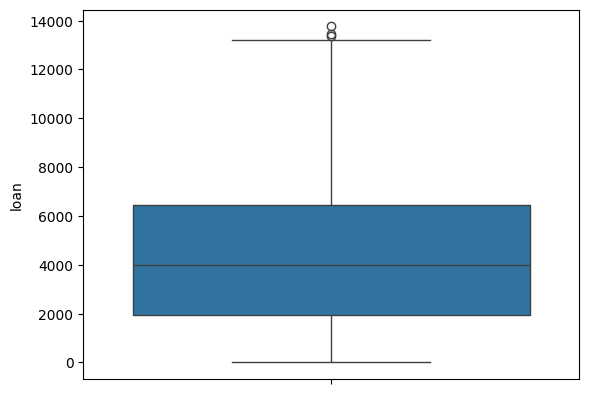

In [9]:
grafico = sns.boxplot(base_credit, y='loan')

In [10]:
outliers_loan = base_credit[base_credit['loan'] > 13300]
outliers_loan

,clientid,income,age,loan,default
1378,1379,69755.320163,44.543682,13766.051239,0
1584,1585,67289.585683,26.727400,13376.797706,1
1801,1802,67802.694456,49.037987,13443.473176,0


## Detecção de Outliers com Gráfico de Dispersão

- Income x Age

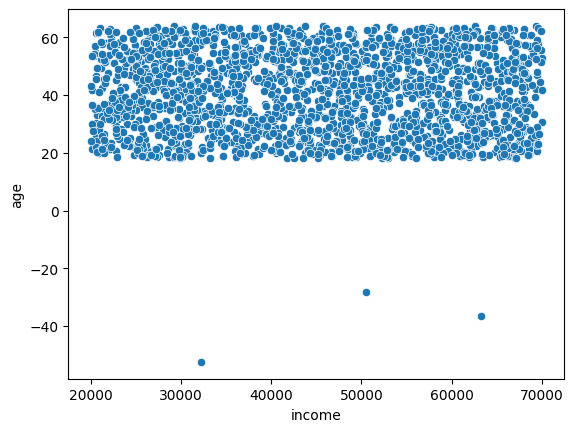

In [11]:
grafico = sns.scatterplot(x=base_credit['income'], y=base_credit['age'])

- Income x Loan

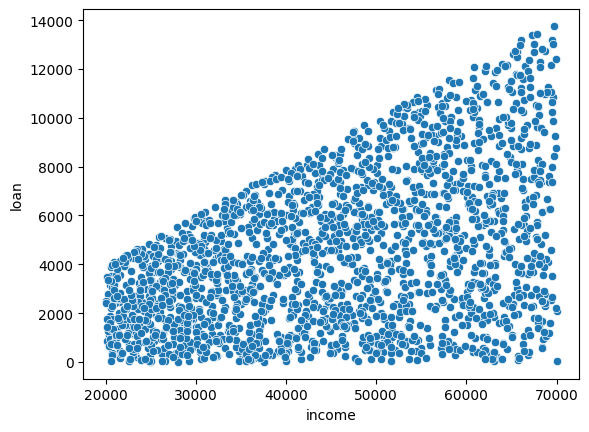

In [12]:
grafico = sns.scatterplot(x=base_credit['income'], y=base_credit['loan'])

- Age x Loan

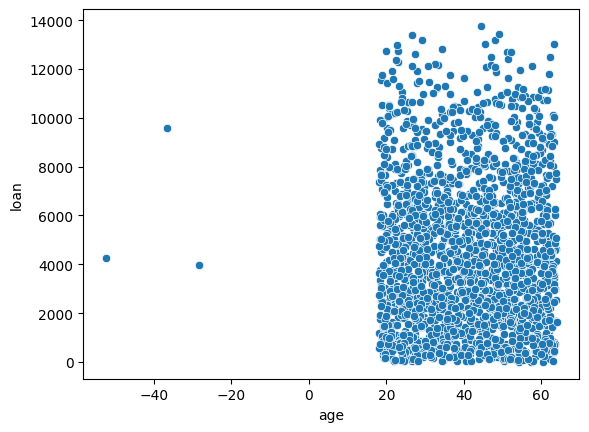

In [13]:
grafico = sns.scatterplot(x=base_credit['age'], y=base_credit['loan'])

### Base Census

In [14]:
base_census = pd.read_csv('../data/census.csv')
base_census

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


- Age x final weight

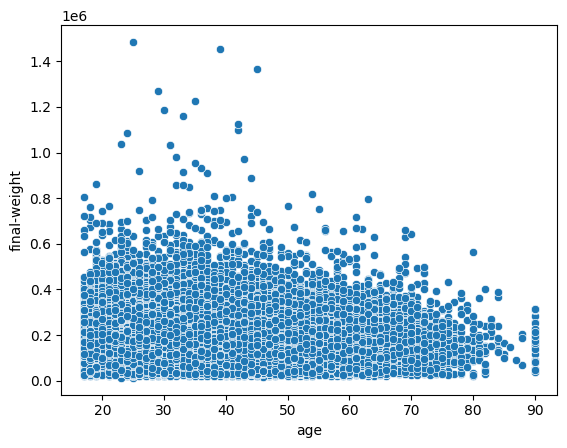

In [15]:
grafico = sns.scatterplot(x = base_census['age'], y = base_census['final-weight'])

## Detecção de Outliers com PYOD

In [16]:
from pyod.models.knn import KNN

In [17]:
detector = KNN()
detector.fit(base_credit.iloc[:,1:4])

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [18]:
previsoes = detector.labels_
previsoes

array([0, 0, 0, ..., 0, 0, 1])

- 0: não é um outlier
- 1: é um outlier

In [19]:
# Contando os outliers
np.unique(previsoes, return_counts=True)

(array([0, 1]), array([1797,  200]))

200 outliers.

In [20]:
confianca_previsoes = detector.decision_scores_
confianca_previsoes

array([ 704.78948078,  365.218309  ,  583.2159934 , ...,  395.01466508,
        557.88978241, 1071.5109404 ])

In [21]:
# Buscando os dados que são outliers
outliers = []
for i in range(len(previsoes)):
    if previsoes[i] == 1:
        outliers.append(i)

In [22]:
print(outliers)

[4, 24, 28, 31, 35, 75, 87, 92, 101, 102, 108, 112, 125, 154, 157, 160, 162, 183, 215, 217, 231, 234, 272, 279, 289, 294, 301, 321, 322, 332, 339, 343, 347, 357, 358, 372, 391, 399, 401, 402, 411, 418, 419, 424, 446, 447, 449, 451, 477, 485, 486, 502, 505, 520, 528, 530, 532, 545, 570, 596, 630, 643, 660, 694, 707, 713, 734, 745, 762, 764, 839, 848, 875, 877, 882, 898, 924, 927, 930, 937, 942, 943, 949, 972, 974, 987, 989, 993, 996, 999, 1003, 1015, 1022, 1025, 1031, 1033, 1037, 1038, 1047, 1054, 1062, 1080, 1085, 1088, 1089, 1091, 1098, 1099, 1125, 1136, 1137, 1181, 1194, 1197, 1199, 1205, 1207, 1209, 1216, 1219, 1232, 1233, 1236, 1288, 1289, 1300, 1335, 1347, 1348, 1367, 1374, 1375, 1376, 1379, 1382, 1385, 1386, 1393, 1411, 1412, 1414, 1425, 1426, 1432, 1440, 1445, 1451, 1467, 1478, 1489, 1503, 1511, 1513, 1517, 1563, 1579, 1581, 1605, 1607, 1613, 1615, 1623, 1627, 1632, 1645, 1657, 1665, 1669, 1672, 1676, 1678, 1685, 1691, 1702, 1713, 1717, 1724, 1730, 1736, 1749, 1752, 1784, 1798, 

In [23]:
lista_outliers = base_credit.iloc[outliers,:]
lista_outliers

,clientid,income,age,loan,default
4,5,66952.688845,18.584336,8770.099235,1
24,25,65301.984029,48.840922,5465.267886,0
29,30,58842.891308,54.510948,10871.186790,0
34,35,57584.973790,36.672021,1728.423755,0
38,39,60921.063104,18.840526,968.836383,0
...,...,...,...,...,...
1943,1944,59792.508585,24.187499,660.241453,0
1944,1945,35879.519994,41.072935,5335.403499,0
1957,1958,50458.958203,52.314565,9852.889427,0
1996,1997,69516.127573,23.162104,3503.176156,0
